# 01 Imports

In [897]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import confusion_matrix
import warnings

from sklearn.tree import plot_tree

# 02 Data

In [898]:
!pip install kaggle

In [899]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [900]:
import os
import shutil

source_path = '/content/gdrive/MyDrive/kaggle/kaggle.json'
destination_dir = '/root/.kaggle/'
destination_path = os.path.join(destination_dir, 'kaggle.json')

os.makedirs(destination_dir, exist_ok=True)
shutil.copy(source_path, destination_path)

!chmod 600 {destination_path}

In [901]:
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
sleep-health-and-lifestyle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [902]:
!unzip -o sleep-health-and-lifestyle-dataset.zip

Archive:  sleep-health-and-lifestyle-dataset.zip
  inflating: Sleep_health_and_lifestyle_dataset.csv  


In [903]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [904]:
df = df.drop(columns=['Person ID']).drop_duplicates().reset_index(drop=True)

In [905]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia


# 03 EDA

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   132 non-null    object 
 1   Age                      132 non-null    int64  
 2   Occupation               132 non-null    object 
 3   Sleep Duration           132 non-null    float64
 4   Quality of Sleep         132 non-null    int64  
 5   Physical Activity Level  132 non-null    int64  
 6   Stress Level             132 non-null    int64  
 7   BMI Category             132 non-null    object 
 8   Blood Pressure           132 non-null    object 
 9   Heart Rate               132 non-null    int64  
 10  Daily Steps              132 non-null    int64  
 11  Sleep Disorder           59 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 12.5+ KB


In [876]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,41.128788,7.082576,7.151515,58.393939,5.537879,71.204545,6637.878788
std,8.813942,0.775335,1.269037,20.468840,1.740428,4.867306,1766.288657
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,33.750000,6.400000,6.000000,44.250000,4.000000,68.000000,5000.000000
50%,41.000000,7.150000,7.000000,60.000000,6.000000,70.000000,7000.000000
75%,49.000000,7.725000,8.000000,75.000000,7.000000,74.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Charts

In [877]:
cols_for_hist = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Sleep Disorder']
cols_for_bar_charts = ['Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Daily Steps']

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Heart Rate'}>, <Axes: >]], dtype=object)

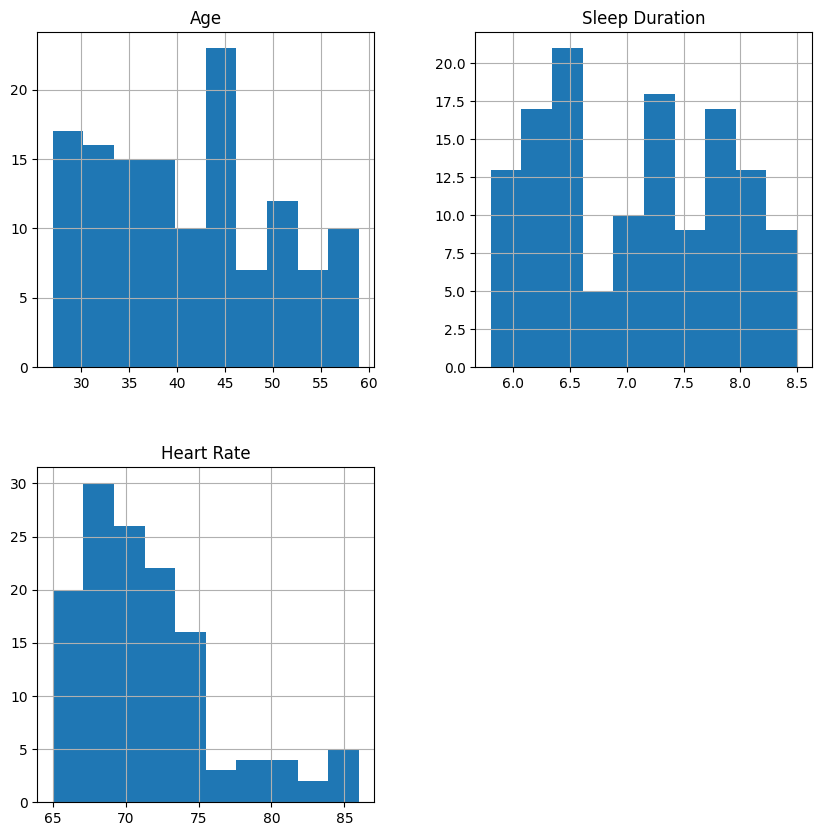

In [878]:
df.hist(column = cols_for_hist, figsize=(10, 10), bins=10)

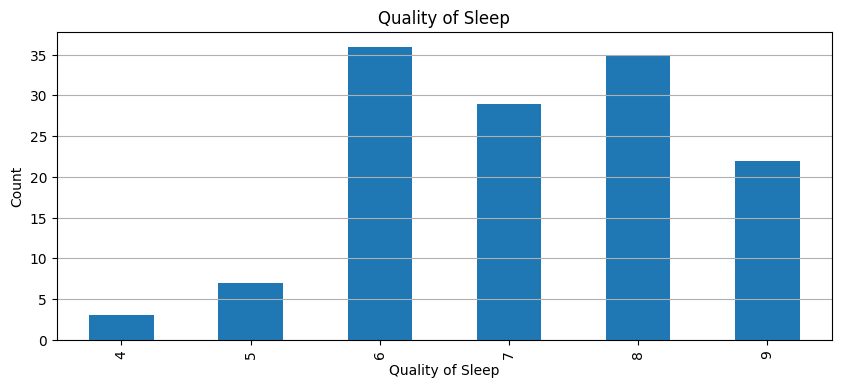

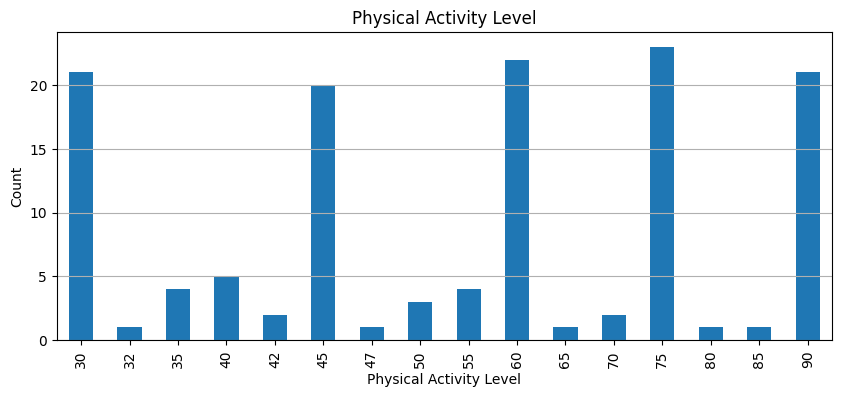

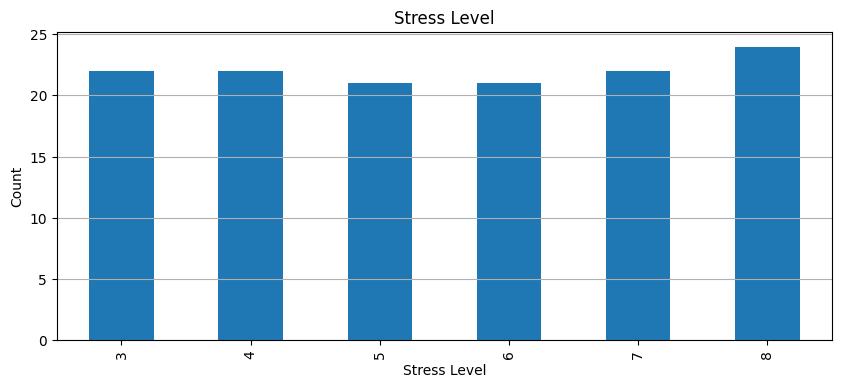

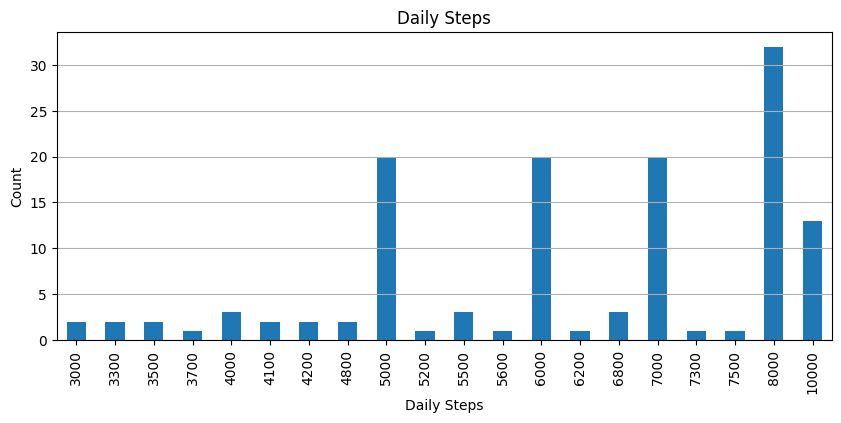

In [879]:
for col in cols_for_bar_charts:

  value_counts_sorted = df[col].value_counts().sort_index(ascending=True)


  value_counts_sorted.plot(kind='bar', figsize=(10, 4))
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.grid(which = 'major', axis = 'y')
  plt.show()

Groupby

sleep duration by occupation

In [880]:
df.groupby('Occupation')['Sleep Duration'].agg(['mean', 'count']).sort_values(by='mean', ascending=True)

,mean,count
Occupation,,
Sales Representative,5.900000,1
Scientist,6.000000,2
Salesperson,6.422222,9
Software Engineer,6.500000,3
Teacher,6.720000,15
Manager,6.900000,1
Nurse,6.965517,29
Doctor,7.050000,24
Accountant,7.136364,11


sleep duration by bmi

In [881]:
df['BMI Category'].value_counts()

BMI Category
Normal           57
Overweight       52
Normal Weight    16
Obese             7
Name: count, dtype: int64

In [882]:
df.groupby('BMI Category')['Sleep Duration'].agg(['mean', 'count']).sort_values(by='mean', ascending=True)

,mean,count
BMI Category,,
Overweight,6.742308,52
Obese,6.900000,7
Normal Weight,7.206250,16
Normal,7.380702,57


quality of sleep by occupation

In [883]:
df.groupby('Occupation')['Quality of Sleep'].agg(['mean', 'count']).sort_values(by='mean', ascending=True)

,mean,count
Occupation,,
Sales Representative,4.000000,1
Scientist,5.000000,2
Salesperson,6.000000,9
Software Engineer,6.000000,3
Doctor,6.750000,24
Teacher,6.800000,15
Manager,7.000000,1
Nurse,7.068966,29
Lawyer,7.733333,15


quality of sleep by bmi

In [884]:
df.groupby('BMI Category')['Quality of Sleep'].agg(['mean', 'count']).sort_values(by='mean', ascending=True)

,mean,count
BMI Category,,
Obese,6.285714,7
Overweight,6.769231,52
Normal Weight,7.125000,16
Normal,7.614035,57


In [885]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
127,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN
128,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
129,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
130,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# 04 Data processing

In [886]:
def encode_gender(df):
  df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})
  df['Gender_Female'] = df['Gender'].map({'Male': 0, 'Female': 1})
  df = df.drop('Gender', axis=1)
  return df


def encode_occupation(df):
  occupation_counts = df['Occupation'].value_counts()
  least_frequent = occupation_counts.nsmallest(4).index.tolist()
  df['Occupation'] = df['Occupation'].replace(least_frequent, 'Other')

  one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
  occupation_encoded = one_hot_encoder.fit_transform(df[['Occupation']])

  occupation_categories = one_hot_encoder.categories_[0]
  occupation_columns = [f'Occupation_{category}' for category in occupation_categories]
  occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=occupation_columns)

  df = df.drop('Occupation', axis=1)
  df = pd.concat([df, occupation_encoded_df], axis=1)
  return df


def encode_bmi_category(df):
  df['BMI Category'].replace('Normal Weight', 'Normal', inplace=True)
  label_mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
  df['BMI Category'] = df['BMI Category'].map(label_mapping)
  return df


def split_blood_pressure(df):
  blood_pressure_encoded = df['Blood Pressure'].str.split('/', expand=True)
  blood_pressure_encoded.columns = ['Systolic Pressure', 'Diastolic Pressure']
  blood_pressure_encoded = blood_pressure_encoded.astype(int)
  df = df.drop('Blood Pressure', axis=1)
  df = pd.concat([df, blood_pressure_encoded], axis=1)
  return df

# 05 Model

In [887]:
transformed_df = df\
.pipe(encode_gender)\
.pipe(encode_occupation)\
.pipe(encode_bmi_category)\
.pipe(split_blood_pressure)

In [888]:
transformed_df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,...,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Other,Occupation_Salesperson,Occupation_Teacher,Systolic Pressure,Diastolic Pressure
0,27,6.1,6,42,6,1,77,4200,NaN,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,126,83
1,28,6.2,6,60,8,0,75,10000,NaN,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,125,80
2,28,5.9,4,30,8,2,85,3000,Sleep Apnea,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,140,90
3,28,5.9,4,30,8,2,85,3000,Insomnia,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,140,90
4,29,6.3,6,40,7,2,82,3500,Insomnia,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,59,8.0,9,75,3,1,68,7000,NaN,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,140,95
128,59,8.1,9,75,3,1,68,7000,NaN,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,140,95
129,59,8.2,9,75,3,1,68,7000,Sleep Apnea,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,140,95
130,59,8.0,9,75,3,1,68,7000,Sleep Apnea,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,140,95


## 05.1. Pipeline + grid search

In [889]:
warnings.filterwarnings('ignore')

X = transformed_df.drop(columns=['Quality of Sleep', 'Sleep Duration', 'Sleep Disorder'])
y = transformed_df['Quality of Sleep']

numeric_columns = X.select_dtypes(include=['number']).columns.to_list()
numeric_columns = [col for col in numeric_columns if not col.startswith(('Gender', 'Occupation'))]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', BaggingClassifier(base_estimator=RandomForestClassifier(),
                                     bootstrap=True,
                                     random_state=42))
])

param_grid = {
    'classifier__n_estimators': [10, 20, 30],
    'classifier__base_estimator__max_depth': [5, 10, 15],
    'classifier__base_estimator__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = grid_search.predict(X_test)

In [891]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'classifier__base_estimator__max_depth': 10, 'classifier__base_estimator__min_samples_split': 2, 'classifier__n_estimators': 30}
Best score:  0.9142857142857144


In [892]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.67      1.00      0.80         2
           6       1.00      0.88      0.93         8
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         4

    accuracy                           0.96        27
   macro avg       0.93      0.97      0.95        27
weighted avg       0.98      0.96      0.97        27



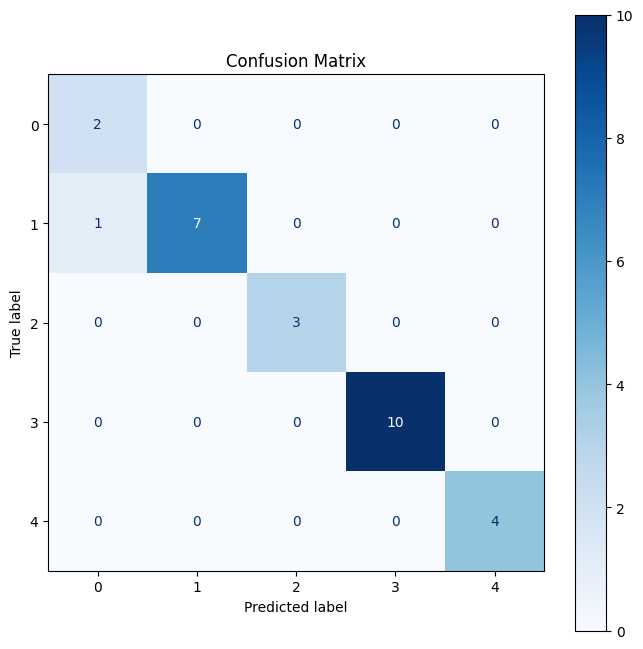

In [893]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 05.2. Plotting trees

In [894]:
tree_count = 0
max_trees = 10

for rf_idx, rf in enumerate(best_model.named_steps['classifier'].estimators_):
    for estimator_idx, estimator in enumerate(rf.estimators_):
        if tree_count >= max_trees:
            break
        plt.figure(figsize=(20, 16))
        plot_tree(estimator, filled=True)
        plt.title(f"Estimator {rf_idx + 1}, Tree {tree_count + 1}")
        plt.show()

        tree_count += 1
    if tree_count >= max_trees:
        break

Output hidden; open in https://colab.research.google.com to view.